## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

## Load Libraries

In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
train = pd.read_csv('bigmart_train.csv')

In [89]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


* Item_Identifier, Outlet_Identifier these two coloumns have no use for prediction

In [90]:
train.shape

(8523, 12)

## Check for Missing Values

In [91]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## EDA

<font color=red|pink|yellow>**learner tasks (intentionally skipped)**</font>

**Exploratory Data Analysis**

1. Univariate analysis on 
 1. Target variable - Item outlet sales (histogram)
 1. Independent variables (numeric and categorical) - histograms(of numeric vars) & countplot(categ vars)

2. Bivariate analysis
 1.  Explore Independent variables with respect to the target variable - scatterplots
 
3. Correlation matrix

In [92]:
train['Item_Fat_Content'].unique()
#notice Low fat, Low Fat, LF are all the same variable

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* here Low Fat, low fat and LF are same but naming is diffrent so make them all same name

In [93]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

* if we think about it then year value is not so usefull 
* even through it is number but by nature it is a categorical feature and these values are categorical label,
* calculating mean, max, mode doesnot make sense 
* we will make better use of this year by calculating a new coloum of age with name outlate_age
* this technique called **feature engineering** that is creating new feature with the help of existing information

In [94]:
# Feature Engineering - createing a new variable for age of the outlet
train['Outlet_Age'] = 2022 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [95]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

* missing value present in outlet_size

In [96]:
train.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29,24.17
std,4.64,0.05,62.28,8.37,1706.50,8.37
min,4.56,0.00,31.29,1985.00,33.29,13.00
25%,8.77,0.03,93.83,1987.00,834.25,18.00
50%,12.60,0.05,143.01,1999.00,1794.33,23.00
75%,16.85,0.09,185.64,2004.00,3101.30,35.00
max,21.35,0.33,266.89,2009.00,13086.96,37.00


In [97]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [98]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [99]:
train['Outlet_Size'].mode()[0]

'Medium'

## Missing Values Imputation

In [100]:
# fill the na for outlet size with medium
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [101]:
# fill the na for item weight with the mean of weights
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

## Check for Outliers & Drop them

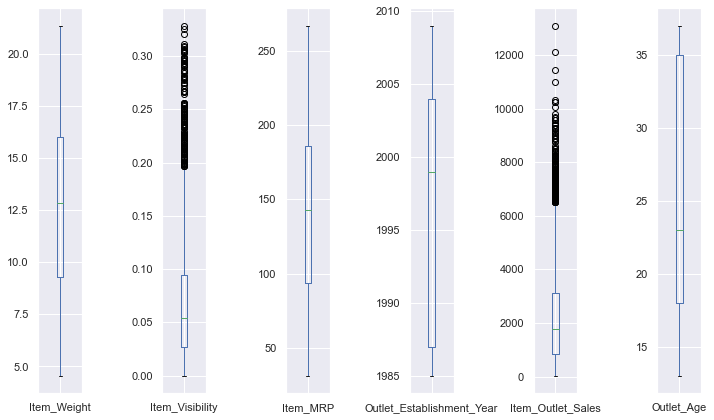

In [102]:
train.plot(kind='box', subplots=True, figsize=(10,6))
plt.tight_layout();

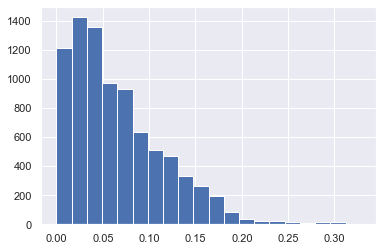

In [103]:
train['Item_Visibility'].hist(bins=20);

* 'Item_Visibility' has right skewed data

In [104]:
# delete the observations which have outlier values for Item visibility

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)

filt = (train['Item_Visibility'] < UL) & (train['Item_Visibility'] > LL) # deleting outlier
filt_train = train[filt]
filt_train
# filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,35
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,20
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [105]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [106]:
train = filt_train.copy()
train.shape

(8379, 13)

### Convert Item Visibility Bins to Categorical Feature

In [107]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.145266      2
0.122016      2
0.106539      2
           ... 
0.013442      1
0.081261      1
0.030693      1
0.052493      1
0.031007      1
Name: Item_Visibility, Length: 7736, dtype: int64

* from above output it is clear that y most of that item has 0 visibality i.e 526 item, 
* after that all other values there is single digit values 
* so in such scinario we can convert those into cateorical feature 
* following code convert those into catregorical form

In [108]:
#creating Item Visibility Bins continuous feature to categorical feature
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

* 0.000-0.065=> Low Viz
* 0.065-0.130=> Viz
* 0.130-0.200=> High Viz

In [109]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [110]:
# replace missing values with low visibility as it is the mode value
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan,'Low Viz')

* Replacing missing values with Low Viz (mode value i.e  ferquntly repeated values)

In [111]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

here we are converting diffrent label of same class into same name of  "Low Fat" and  "Regular"

In [112]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,NaN


## Encode Text Values In Categorical Features

In [113]:
#creating oject of LabelEncoder
le = LabelEncoder()

In [114]:
#checking unique values
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [115]:
#fit transform
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [116]:
# one_hot_encoding
# create dummies for outlet type
train = pd.get_dummies(train, columns=['Outlet_Type'])

In [117]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,3735.1380,23,1,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,443.4228,13,1,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,2097.2700,23,1,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,732.3800,24,3,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,994.7052,35,3,0,1,0,0


* due to one_hot_encoding(get_dummies) 3 extra columns are created we need to delet these coulumn

In [118]:
train.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Fat_Content                   int32
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Outlet_Size                        int32
Outlet_Location_Type               int32
Item_Outlet_Sales                float64
Outlet_Age                         int64
Item_Visibility_bins               int32
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [119]:
# got to drop all the object types features which are not useful

train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year'], axis=1)

In [120]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [121]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,23,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,13,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,23,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,24,3,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,35,3,0,1,0,0


## Linear Regression Modelling

In [122]:
# build the linear regression model
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

**Loading the test data set and performing all the preprocessing done on train data, on the test as well**

In [123]:
test = pd.read_csv('bigmart_test.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [124]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [125]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [126]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [127]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [128]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [129]:
test['Outlet_Age'] = 2022 - test['Outlet_Establishment_Year']

In [130]:
test = pd.get_dummies(test, columns=['Outlet_Type'])

In [131]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year'], axis=1)

In [132]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Outlet_Type_Grocery Store',
        'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
        'Outlet_Type_Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Outlet_Age', 'Outlet_Type_Grocery Store',
        'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
        'Outlet_Type_Supermarket Type3'],
       dtype='object'))

In [133]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [134]:
lin = LinearRegression()

In [135]:
lin.fit(xtrain, ytrain)
print(lin.coef_)
lin.intercept_


[    3.35428815    27.12327436  -105.837685      15.96668691
    16.78107616     8.03527797    -2.2746766     23.30477597
 -1754.40351049   219.65802578  -122.50086968  1657.24635438]


-200.6646168718762

In [136]:
predictions = lin.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

1118.480514371628


In [137]:
from sklearn.metrics import r2_score
r2_test = r2_score(ytest, predictions)
r2_test

0.5485619688787269

In [138]:
pred_train = lin.predict(xtrain)

In [139]:
r2_train = r2_score(ytrain,pred_train )
r2_train

0.5604538675682431

## Ridge Model

In [140]:
# train Ridge model and calculate rmse on test data
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(xtrain, ytrain)
ridge_predictions = ridge.predict(xtest)
ridge_rmse = sqrt(mean_squared_error(ytest, ridge_predictions))
ridge_r2 = r2_score(ytest, ridge_predictions)
ridge_rmse, ridge_r2


(1118.4804819581263, 0.5485619950440233)

## Lasso Model

In [141]:
# train Lasso model and calculate rmse on test data
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(xtrain, ytrain)
lasso_predictions = lasso.predict(xtest)
lasso_rmse = sqrt(mean_squared_error(ytest, lasso_predictions))
lasso_r2 = r2_score(ytest, lasso_predictions)
lasso_rmse, lasso_r2

(1118.4809581208165, 0.5485616106690001)

## ElasticNet Model

In [142]:
# train ElasticNet and calculate rmse on test data
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticnet.fit(xtrain, ytrain)
elasticnet_predictions = elasticnet.predict(xtest)
elasticnet_rmse = sqrt(mean_squared_error(ytest, elasticnet_predictions))
elasticnet_r2 = r2_score(ytest, elasticnet_predictions)
elasticnet_rmse, elasticnet_r2

(1118.3899961974291, 0.5486350353153593)

* above three ridge, Lasso and ElasticNet  models gives the same output as regresssion 
* These three model uses fewer number of feature than the Linear regresssion models
* these models delet the features which are not useful for predictions
* insted of use more feature it is good to fewer features (if model gives same result)

**Note:**
    * lambada in forrmula => here alpha in above model